In [1]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Learn the Basics](intro.html) \|\| **Quickstart** \|\|
[Tensors](tensorqs_tutorial.html) \|\| [Datasets &
DataLoaders](data_tutorial.html) \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Quickstart
==========

This section runs through the API for common tasks in machine learning.
Refer to the links in each section to dive deeper.

Working with data
-----------------

PyTorch has two [primitives to work with
data](https://pytorch.org/docs/stable/data.html):
`torch.utils.data.DataLoader` and `torch.utils.data.Dataset`. `Dataset`
stores the samples and their corresponding labels, and `DataLoader`
wraps an iterable around the `Dataset`.


In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

PyTorch offers domain-specific libraries such as
[TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and
[TorchAudio](https://pytorch.org/audio/stable/index.html), all of which
include datasets. For this tutorial, we will be using a TorchVision
dataset.

The `torchvision.datasets` module contains `Dataset` objects for many
real-world vision data like CIFAR, COCO ([full list
here](https://pytorch.org/vision/stable/datasets.html)). In this
tutorial, we use the FashionMNIST dataset. Every TorchVision `Dataset`
includes two arguments: `transform` and `target_transform` to modify the
samples and labels respectively.


In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.2MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 207kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.87MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.65MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
from torchvision.datasets import FashionMNIST

# Load FashionMNIST without applying ToTensor()
dataset = FashionMNIST(root="data", train=True, download=True)

# Get the first image and label
image, label = dataset[0]

print(type(image))  # Output: <class 'PIL.Image.Image'>
print(image.size)   # Output: (28, 28)  # Size of the image


<class 'PIL.Image.Image'>
(28, 28)


In [6]:
label

9

In [7]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

# Load FashionMNIST with ToTensor transformation
dataset = FashionMNIST(root="data", train=True, download=True, transform=ToTensor())

# Get the first image and label
image, label = dataset[0]

print(type(image))  # Output: <class 'torch.Tensor'>
print(image.shape)  # Output: torch.Size([1, 28, 28])  # Shape: [Channels, Height, Width]
print(image.min(), image.max())  # Output: tensor(0.0) tensor(1.0)


<class 'torch.Tensor'>
torch.Size([1, 28, 28])
tensor(0.) tensor(1.)


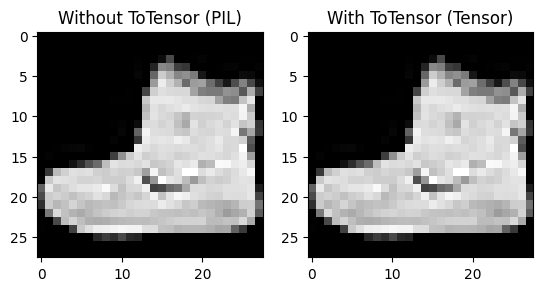

In [8]:
import matplotlib.pyplot as plt

# Without ToTensor
image_pil, _ = FashionMNIST(root="data", train=True, download=True)[0]

# With ToTensor
image_tensor, _ = FashionMNIST(root="data", train=True, download=True, transform=ToTensor())[0]

# Plot the PIL image
plt.subplot(1, 2, 1)
plt.title("Without ToTensor (PIL)")
plt.imshow(image_pil, cmap="gray")

# Plot the tensor image (convert to NumPy for visualization)
plt.subplot(1, 2, 2)
plt.title("With ToTensor (Tensor)")
plt.imshow(image_tensor.squeeze(0).numpy(), cmap="gray")

plt.show()


In [9]:
import torch

# Create a tensor with a single channel dimension
tensor = torch.randn(1, 1, 4, 1, 4)  # Shape: [1, 4, 4]

print("Original tensor shape:", tensor.shape)
# Remove the channel dimension (dim=0) using squeeze
squeezed_tensor = tensor.squeeze(3)  # Removes the first dimension (size=1)

print("Squeezed tensor shape:", squeezed_tensor.shape)

Original tensor shape: torch.Size([1, 1, 4, 1, 4])
Squeezed tensor shape: torch.Size([1, 1, 4, 4])


In [10]:
image_tensor.squeeze(0).numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

We pass the `Dataset` as an argument to `DataLoader`. This wraps an
iterable over our dataset, and supports automatic batching, sampling,
shuffling and multiprocess data loading. Here we define a batch size of
64, i.e. each element in the dataloader iterable will return a batch of
64 features and labels.


In [11]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


Read more about [loading data in PyTorch](data_tutorial.html).


------------------------------------------------------------------------


Creating Models
===============

To define a neural network in PyTorch, we create a class that inherits
from
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
We define the layers of the network in the `__init__` function and
specify how data will pass through the network in the `forward`
function. To accelerate operations in the neural network, we move it to
the GPU or MPS if available.


In [12]:
torch.cuda.is_available()

True

In [13]:
torch.backends.mps.is_available()

False

In [14]:
torch.cpu

<module 'torch.cpu' from '/usr/local/lib/python3.10/dist-packages/torch/cpu/__init__.py'>

In [15]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Read more about [building neural networks in
PyTorch](buildmodel_tutorial.html).


------------------------------------------------------------------------


Optimizing the Model Parameters
===============================

To train a model, we need a [loss
function](https://pytorch.org/docs/stable/nn.html#loss-functions) and an
[optimizer](https://pytorch.org/docs/stable/optim.html).


In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In a single training loop, the model makes predictions on the training
dataset (fed to it in batches), and backpropagates the prediction error
to adjust the model\'s parameters.


In [29]:
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [27]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the model\'s performance against the test dataset to
ensure it is learning.


In [40]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (*epochs*).
During each epoch, the model learns parameters to make better
predictions. We print the model\'s accuracy and loss at each epoch;
we\'d like to see the accuracy increase and the loss decrease with every
epoch.


In [41]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309258  [   64/60000]
loss: 2.301560  [ 6464/60000]
loss: 2.281779  [12864/60000]
loss: 2.271621  [19264/60000]
loss: 2.263989  [25664/60000]
loss: 2.220370  [32064/60000]
loss: 2.236022  [38464/60000]
loss: 2.200984  [44864/60000]
loss: 2.194708  [51264/60000]
loss: 2.167877  [57664/60000]
Test Error: 
 Accuracy: 33.3%, Avg loss: 2.164740 

Epoch 2
-------------------------------
loss: 2.174001  [   64/60000]
loss: 2.168783  [ 6464/60000]
loss: 2.112257  [12864/60000]
loss: 2.127257  [19264/60000]
loss: 2.078972  [25664/60000]
loss: 2.007810  [32064/60000]
loss: 2.046914  [38464/60000]
loss: 1.971034  [44864/60000]
loss: 1.972161  [51264/60000]
loss: 1.905736  [57664/60000]
Test Error: 
 Accuracy: 54.4%, Avg loss: 1.908734 

Epoch 3
-------------------------------
loss: 1.937619  [   64/60000]
loss: 1.907431  [ 6464/60000]
loss: 1.801768  [12864/60000]
loss: 1.844984  [19264/60000]
loss: 1.725331  [25664/60000]
loss: 1.673286  [32064/600

Read more about [Training your model](optimization_tutorial.html).


------------------------------------------------------------------------


Saving Models
=============

A common way to save a model is to serialize the internal state
dictionary (containing the model parameters).


In [42]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Loading Models
==============

The process for loading a model includes re-creating the model structure
and loading the state dictionary into it.


In [43]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

This model can now be used to make predictions.


In [45]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


Read more about [Saving & Loading your
model](saveloadrun_tutorial.html).


In [46]:
print(model.state_dict())

OrderedDict([('linear_relu_stack.0.weight', tensor([[ 0.0304,  0.0133,  0.0269,  ...,  0.0119, -0.0302,  0.0356],
        [ 0.0189, -0.0303, -0.0246,  ...,  0.0264, -0.0024, -0.0127],
        [-0.0287,  0.0176,  0.0097,  ...,  0.0150, -0.0199,  0.0290],
        ...,
        [-0.0269, -0.0143, -0.0179,  ...,  0.0298,  0.0290,  0.0104],
        [-0.0089, -0.0299,  0.0129,  ..., -0.0008,  0.0187,  0.0173],
        [-0.0261,  0.0158, -0.0212,  ..., -0.0096, -0.0046,  0.0139]],
       device='cuda:0')), ('linear_relu_stack.0.bias', tensor([ 1.9580e-03, -1.5295e-02,  3.0064e-02,  1.8931e-03,  9.0409e-03,
        -2.1047e-02, -3.5775e-02,  2.6454e-02, -2.2649e-02, -3.2153e-02,
        -1.0577e-02,  1.9502e-02, -2.4501e-02,  7.2165e-03, -1.8650e-02,
        -2.8261e-02,  3.3240e-02, -8.0117e-03,  2.1212e-02,  1.8400e-02,
        -3.4555e-05, -1.3904e-03,  3.0873e-02,  3.1764e-02, -2.1185e-03,
        -2.1526e-02, -1.5982e-02,  2.9396e-02, -2.2566e-02,  2.1451e-03,
         1.0984e-02,  2.2626e